## Ch2-1 실습 - 다중선형 회귀분석

### 선형 회귀 (Linear regression)
Data and model (hypothesis) 정의 y = Wx + b

Parameters value (tf): <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>
Parameters value (np): 3.0 0.5
Hypothesis value [ 3.5  6.5  9.5 12.5 15.5]


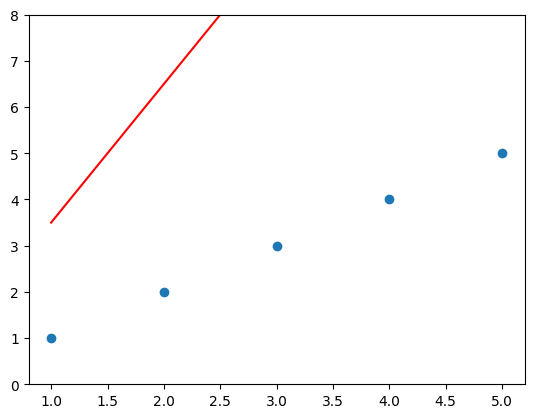

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1, 2, 3, 4, 5])

# Define hypothesis (model)
W = tf.Variable(3.0)
b = tf.Variable(0.5)
print('Parameters value (tf):', W, b)
print('Parameters value (np):', W.numpy(), b.numpy())

hypothesis = W * x_data + b
print('Hypothesis value', hypothesis.numpy())

# Plot hypothesis and data
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()


### Cost function

$$cost(W) = \sum (H(x^{(i)}) - y^{(i)})^2$$

tf.reduced_mean: 3
tf.square(3):  9
cost= 50.25


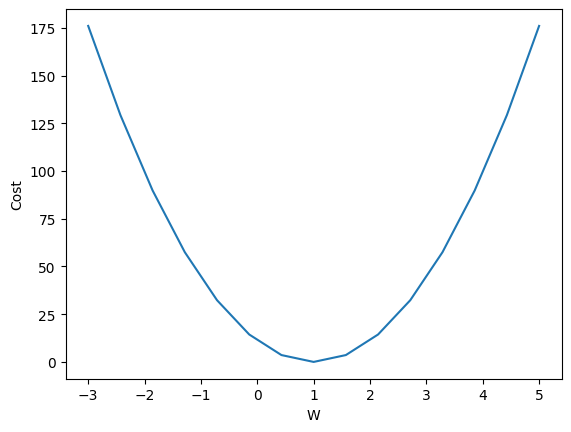

In [4]:
# Define cost function
print('tf.reduced_mean:', tf.reduce_mean(x_data).numpy())
print('tf.square(3): ', tf.square(3).numpy())

cost = tf.reduce_mean(tf.square(hypothesis - y_data))
print('cost=', cost.numpy())

# Generate a range of weight values
w_list = np.linspace(-3, 5, num=15)
cost_values = []

# Calculate cost for each weight
for idx, w_val in enumerate(w_list):
    hyp = w_val * x_data
    cost = tf.reduce_mean(tf.square(hyp - y_data)).numpy()
    cost_values.append(cost)

# Plotting
plt.plot(w_list, cost_values)
plt.xlabel('W')
plt.ylabel('Cost')
plt.show()


### 경사 하강법 (Gradient Descent) - one step

$$W := W - \alpha\nabla_w cost$$

In [5]:
# Update parameters
# Operation recording for automatic gradients calculation
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# Caculate gradients
W_grad, b_grad = tape.gradient(cost, [W, b])

print('--Update parameters')
print('Previous parameters:', W.numpy(), b.numpy())
print('Gradient =', W_grad.numpy(), b_grad.numpy())

learning_rate = 0.01
# W.assign_sub(x): W 원래 값에서 x값을 뺀 값을 W에 할당함.
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

print('Updated parameters:', W.numpy(), b.numpy())


--Update parameters
Previous parameters: 3.0 0.5
Gradient = 47.0 13.0
Updated parameters: 2.53 0.37


### 경사 하강법 (Gradient Descent) - 100 epoch

Simple linear regression
    0|    2.1712|    0.2708| 29.283398
   10|    1.0911|   -0.0266|  0.132689
   20|    1.0181|   -0.0451|  0.000994
   30|    1.0128|   -0.0449|  0.000373
   40|    1.0121|   -0.0435|  0.000346
   50|    1.0116|   -0.0420|  0.000324
   60|    1.0113|   -0.0406|  0.000303
   70|    1.0109|   -0.0393|  0.000283
   80|    1.0105|   -0.0380|  0.000264
   90|    1.0102|   -0.0367|  0.000247


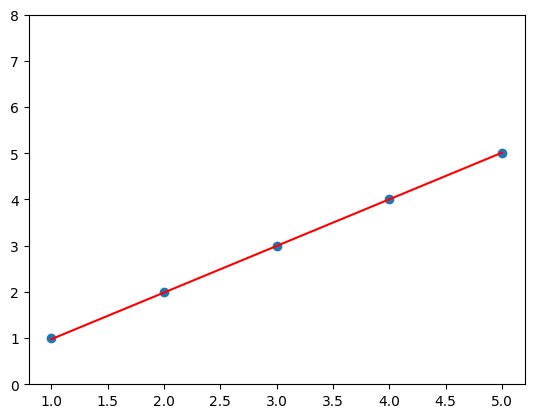

In [6]:
## Gradient Descent 100 epoch
print('Simple linear regression')
# Training loop
for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    # Print and plot every 10th iteration
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost.numpy()))
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)
plt.show()


### 선형회귀 분석 – 예측 모델 활용

측정된 데이터를 바탕으로 예측 모델 개발  
(e.g. x=2.5 일 때, y 값 추정)

In [7]:
# predict

print('Predict')
print(f"{5} -> {(W * 5 + b).numpy()}")
print(f"{2.5} -> {(W * 2.5 + b).numpy()}")


Predict
5 -> 5.013704299926758
2.5 -> 2.48905086517334


### 실습. 선형회귀

1. “traindata.txt” 파일을 불러와서 Graph로 출력하시오
2. “traindata.txt”의 2D data를 선형회귀 (linear regression)로 최적의 직선의 방정식을 구하시오. 
3. (가능하다면 하나의 plot에 2D data 와 직선을 같이 출력하시오)

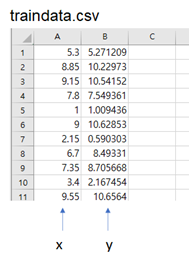

### 다중 선형회귀 분석 – 데이터 생성 및 가시화
quiz1, quiz2, mid1 점수를 이용해서 final 시험 점수 예측 모델

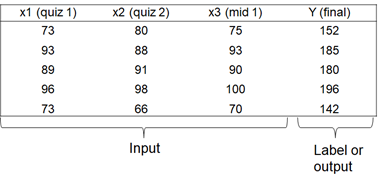

(5, 3)
(5, 1)


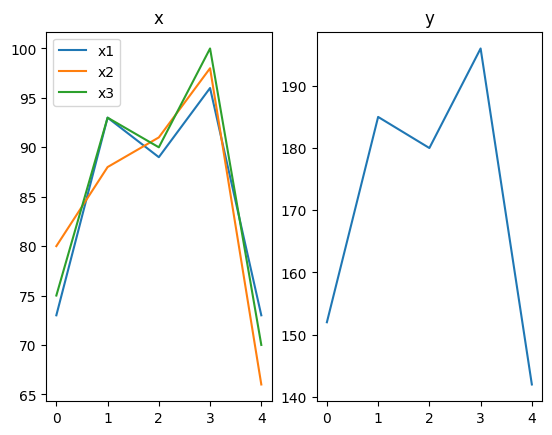

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(0)

x_data = np.array([ [73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100],[73, 66, 70]], dtype=np.float32)

y_data = np.array([[152], [185], [180], [196], [142]], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

# Plotting
plt.subplot(121)
plt.plot(x_data)
plt.title('x')
plt.legend(['x1', 'x2', 'x3'])

plt.subplot(122)
plt.plot(y_data)
plt.title('y')

plt.show()


### 다중 선형 회귀 model (hypothesis) 정의

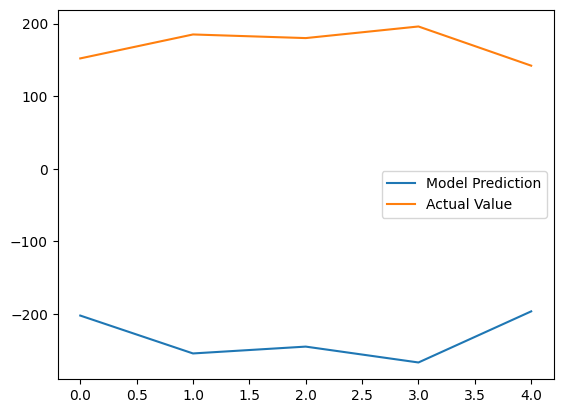

In [18]:
# 모델 설정
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

hypothesis = tf.matmul(x_data, W) + b

# 결과 시각화
plt.plot(hypothesis.numpy(), label='Model Prediction')
plt.plot(y_data, label='Actual Value')
plt.legend()
plt.show()


### 다중 선형 회귀 model (hypothesis) 학습 (one-step)
학습순서: Cost 계산 -> Gradient 계산 -> weight W 업데이트

In [19]:
# 옵티마이저 및 비용 함수 설정
optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001)
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

with tf.GradientTape() as tape:
    hypothesis = tf.matmul(x_data, W) + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

grads = tape.gradient(cost, [W, b])

# 1 에포크(epoch) 동안 파라미터 업데이트
print('Previous parameters')
print('W:', W.numpy().flatten())
print('b:', b.numpy())
learning_rate = 0.00001
optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
#W.assign_sub(learning_rate * grads[0])
#b.assign_sub(learning_rate * grads[1])


print('Updated parameters')
print('W:', W.numpy().flatten())
print('b:', b.numpy())


Previous parameters
W: [-1.8041286  -0.11153453 -0.845551  ]
b: [1.698977]
Updated parameters
W: [-1.1091689   0.58218145 -0.14271092]
b: [1.7070591]


In [23]:
# 훈련 과정
for i in range(2000):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(x_data, W) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    grads = tape.gradient(cost, [W, b])

    optimizer.apply_gradients(zip(grads, [W, b]))
    #W.assign_sub(learning_rate * grads[0])
    #b.assign_sub(learning_rate * grads[1])

    if (i + 1) % 10 == 0:
        print("Epoch: %d\tCost: %10.6f" % (i + 1, cost.numpy()))

print('W:', W.numpy().flatten())
print('b:', b.numpy())


Epoch: 10	Cost:   1.483458
Epoch: 20	Cost:   1.477335
Epoch: 30	Cost:   1.471271
Epoch: 40	Cost:   1.465219
Epoch: 50	Cost:   1.459213
Epoch: 60	Cost:   1.453238
Epoch: 70	Cost:   1.447269
Epoch: 80	Cost:   1.441359
Epoch: 90	Cost:   1.435465
Epoch: 100	Cost:   1.429623
Epoch: 110	Cost:   1.423801
Epoch: 120	Cost:   1.418018
Epoch: 130	Cost:   1.412240
Epoch: 140	Cost:   1.406510
Epoch: 150	Cost:   1.400814
Epoch: 160	Cost:   1.395136
Epoch: 170	Cost:   1.389511
Epoch: 180	Cost:   1.383884
Epoch: 190	Cost:   1.378297
Epoch: 200	Cost:   1.372753
Epoch: 210	Cost:   1.367230
Epoch: 220	Cost:   1.361741
Epoch: 230	Cost:   1.356277
Epoch: 240	Cost:   1.350845
Epoch: 250	Cost:   1.345425
Epoch: 260	Cost:   1.340039
Epoch: 270	Cost:   1.334698
Epoch: 280	Cost:   1.329388
Epoch: 290	Cost:   1.324078
Epoch: 300	Cost:   1.318829
Epoch: 310	Cost:   1.313590
Epoch: 320	Cost:   1.308375
Epoch: 330	Cost:   1.303199
Epoch: 340	Cost:   1.298040
Epoch: 350	Cost:   1.292907
Epoch: 360	Cost:   1.287809
E

### 다중 선형회귀 분석 – 예측 모델 활용

측정된 데이터를 바탕으로 예측 모델 개발
(e.g. quiz1=89, quiz2=95, mid=92 일 때, y(final) 값 추정)


In [24]:

# 예측 함수 정의
def predict(x):
    return (tf.matmul(x, W) + b).numpy()

# 예측 결과 출력
print('--Predict--')
print('Prediction results\n', predict(x_data))
print('Ground truth\n', y_data)

# 새로운 데이터에 대한 예측
new_data = np.array([[89., 95., 92.], [84., 92., 85.]], dtype=np.float32)
print('New data prediction')
print(predict(new_data))


--Predict--
Prediction results
 [[152.06764]
 [184.16829]
 [180.53883]
 [197.09006]
 [140.78722]]
Ground truth
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]]
New data prediction
[[184.2636 ]
 [173.55101]]


### 2022.08.01~26, 안테나 성능 예측 경진대회 at DACON
목표: 공정 데이터 (56종) 을 활용하여 Rader 센서의 안테나 성능 (14종) 예측 모델 개발  
데이터 형태: (X 56개 feature, Y 14개 feature) * 39,607
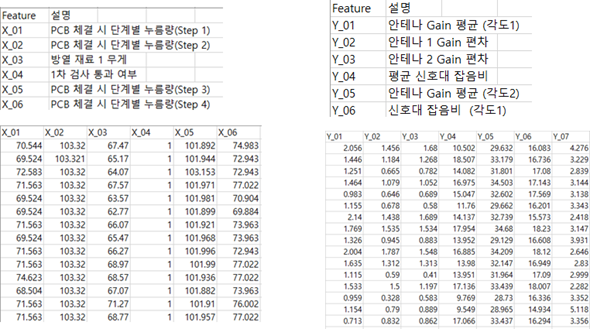

In [25]:
train_data = np.loadtxt('antenna_traindata.csv',delimiter=',')
X_data = train_data[:,:56]
y_data = train_data[:,56]    # 첫 번째 Y feature만 선택
X_data = X_data.astype('float32')
y_data = y_data.astype('float32')

W = tf.Variable(tf.random.normal([56, 1]))
b = tf.Variable(tf.random.normal([1]))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001)
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

for i in range(200):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(X_data, W) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    grads = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(grads, [W, b]))
    if (i + 1) % 10 == 0:
        print("Epoch: %d\tCost: %10.6f" % (i + 1, cost.numpy()))

print('W:', W.numpy().flatten())
print('b:', b.numpy())


Epoch: 10	Cost:        inf
Epoch: 20	Cost:        nan
Epoch: 30	Cost:        nan
Epoch: 40	Cost:        nan
Epoch: 50	Cost:        nan


KeyboardInterrupt: 

### scikit-learn 을 이용한 다중 선형 회귀 분석
메모리 최적화 문제로 Tensorflow로는 선형 회귀 학습이 쉽지 않음   
DNN, CNN을 제외한 많은 종류의 머신 러닝 모델이 scikit-learn 패키지를 통해 구현됨  
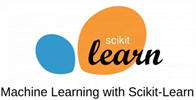

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import numpy as np

train_data = np.loadtxt('antenna_traindata.csv',delimiter=',')
X_data = train_data[:,:56]
y_data = train_data[:,56]

linear_regression_model = LinearRegression() 
linear_regression_model.fit(X_data, y_data)  #학습

test_data = np.loadtxt('antenna_testdata.csv',delimiter=',')
X_test = test_data[:,:56]
y_test = test_data[:,56]

#학습시킨 모델로 예측
y_test_predict = linear_regression_model.predict(X_test) 

# 측정 데이터와 예측 데이터의 오차 제곱합을 구함.
mse = mean_squared_error(y_test, y_test_predict)
print(mse)


0.120346059974765


### 학습된 다중선형회귀 모델을 이용한 성능 예측

In [3]:
y_test_predict = linear_regression_model.predict(X_test[:5])
print("실측 :", y_test[0:5])
print("예측 :", y_test_predict)
print("차이 :", y_test_predict-y_test[0:5])

실측 : [1.348 1.581 1.246 1.346 1.3  ]
예측 : [1.28935774 1.37594249 1.35219114 1.33550249 1.36433881]
차이 : [-0.05864226 -0.20505751  0.10619114 -0.01049751  0.06433881]


### Stress-Strain Curve Fitting

#### Hot compression test
노이즈 많고 비선형적인 곡선에 대해 'Good' fitting curve 를 어떻게 찾을 것인가?
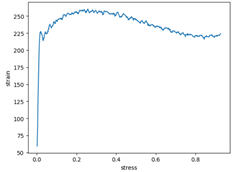

#### 선형 회귀 (Linear Regression)

(465,) (465,)
(465, 1) (465, 1)


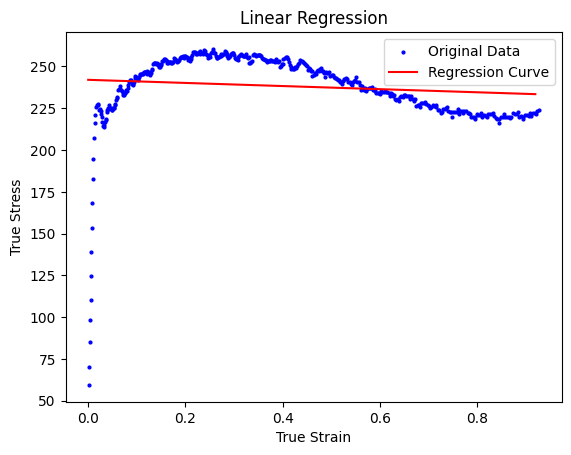

In [5]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
train_data = np.loadtxt('stress_strain_data.csv',delimiter=',')
x_data = train_data[:,0]
y_data = train_data[:,1]
print(x_data.shape,y_data.shape) # 차원 문제로 학습시 오류 발생 

x_data = np.reshape(x_data,(-1,1)) 
y_data = np.reshape(y_data,(-1,1)) 
print(x_data.shape,y_data.shape) # 배열을 reshape 하여 학습

linear_regression_model = LinearRegression()  
linear_regression_model.fit(x_data, y_data)

plt.scatter(x_data, y_data, color='blue' ,label='Original Data', s=4) 
x_data2 = np.linspace(0, 0.92, num = 50)
x_data2 = np.reshape(x_data2, (-1,1))
y_pred = linear_regression_model.predict(x_data2)
plt.plot(x_data2, y_pred, color = 'red', label='Regression Curve')

plt.title('Linear Regression')
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.legend()


#### 다항 회귀 (Polynomial Regression)
sci-kit learn에서 제공하는 함수 사용

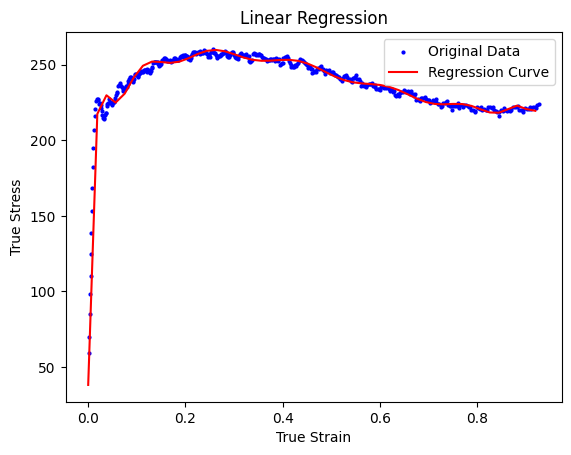

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

# 데이터는 전 페이지에서 불러온 것을 사용
poly_f = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_f.fit_transform(x_data)
linear_regression_model = LinearRegression()  
linear_regression_model.fit(x_poly, y_data)

plt.scatter(x_data, y_data, color='blue' ,label='Original Data', s=4) 
x_data2 = np.linspace(0, 0.92, num = 50)
x_data2 = np.reshape(x_data2, (-1,1))
x_poly2 = poly_f.fit_transform(x_data2)

y_pred = linear_regression_model.predict(x_poly2)
plt.plot(x_data2, y_pred, color = 'red', label='Regression Curve')

plt.title('Linear Regression')
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.legend()


### 실습. 2차 함수 피팅

1. “secondorder_data.csv” 파일을 불러와서 Graph로 출력하시오
2. 2D data를 2차 함수로 최적의 곡선을 방정식을 구하고 출력하시오 
 
추가문제: tensorflow를 이용해서 2차 함수 회귀분석을 수행하시오.  
Hint. $y = w_1x^2 + w_2*x + b = w_1x_1+w_2x_2+b$ 의 형태로 변환하여야함.

